# Observable trends based on the data explored below:

## 1. For cities in both the Northern hemisphere and the Southern Hemisphere, distance from the equator is a good predictor of temperature.
##    The greater the distance from the equator, the lower the city's temperature will be. This can be observed in both of the temperature vs latitude
##    plots with linear regression and the temperature vs latitude scatter plot incorporating both Northern and Southern hemispheres.

## 2. The scatter plot visualizing cloudiness vs latitude does not show a significant relationship between the two. However, there is an interesting trend in
##    which the data is somewhat clustered at the extremes; more cities seem to be either very cloudy or have very few clouds with fewer cities having a more 
##    moderate degree of cloudiness. This is evenly distributed across latitudes, however. 

## 3. T

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['conceicao do araguaia', 'qaanaaq', 'tuktoyaktuk', 'bambous virieux', 'butaritari', 'rikitea', 'timbiqui', 'east london', 'doctor pedro p. pena', 'gold coast', 'shakawe', 'college', 'port elizabeth', 'vila', 'mosetse', 'gravdal', 'la ronge', 'pallasovka', 'lupiro', 'sao filipe', 'torbay', 'lebu', 'poltava', 'gejiu', 'panaba', 'vaitupu', 'chuy', 'san patricio', 'synya', 'de aar', 'thompson', 'batemans bay', 'mitsamiouli', 'grand-santi', 'avarua', 'albany', 'presidencia roque saenz pena', 'camacha', 'sarh', 'huarmey', 'cape town', 'belushya guba', 'sivaki', 'arraial do cabo', 'jamestown', 'bluff', 'punta arenas', 'bubaque', 'hanyang', 'ushuaia', 'kapuskasing', 'praia', 'alpena', 'sentyabrskiy', 'awbari', 'kerrobert', 'baruun-urt', 'yirol', 'saskylakh', 'kangaatsiaq', 'juegang', 'hobart', 'okha', 'buraydah', 'turukhansk', 'yellowknife', 'atuona', 'guarapari', 'biak', 'busselton', 'salta', 'bredasdorp', 'bethel', 'chara', 'yeppoon', 'marcona', 'tasiilaq', 'kapaa', 'porto torres', 'castro'

In [7]:
#run a test api call for a single city and print the json response
testurl = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

testresponse = requests.get(testurl + "london" + key + units).json()
pprint(testresponse)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1627337376,
 'id': 2643743,
 'main': {'feels_like': 65.84,
          'humidity': 83,
          'pressure': 1010,
          'temp': 65.68,
          'temp_max': 67.96,
          'temp_min': 61.77},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2019646,
         'sunrise': 1627272927,
         'sunset': 1627329499,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 5.75}}


In [8]:
cities_url = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

city_count = 0

for city in cities:
    try:
        wresponse = requests.get(cities_url + city + key + units).json()
        City.append(wresponse['name'])
        Lat.append(wresponse['coord']['lat'])
        Lng.append(wresponse['coord']['lon'])
        Max_Temp.append(wresponse['main']['temp_max'])
        Humidity.append(wresponse['main']['humidity'])
        Cloudiness.append(wresponse['clouds']['all'])
        Wind_Speed.append(wresponse['wind']['speed'])
        Country.append(wresponse['sys']['country'])
        Date.append(wresponse['dt'])
        city_count +=1
        print(f"Processing Record {city_count} for {city}")
    except:
        print("City not found. Skipping.")

Processing Record 1 for conceicao do araguaia
Processing Record 2 for qaanaaq
Processing Record 3 for tuktoyaktuk
Processing Record 4 for bambous virieux
Processing Record 5 for butaritari
Processing Record 6 for rikitea
Processing Record 7 for timbiqui
Processing Record 8 for east london
City not found. Skipping.
Processing Record 9 for gold coast
Processing Record 10 for shakawe
Processing Record 11 for college
Processing Record 12 for port elizabeth
Processing Record 13 for vila
Processing Record 14 for mosetse
Processing Record 15 for gravdal
Processing Record 16 for la ronge
Processing Record 17 for pallasovka
Processing Record 18 for lupiro
Processing Record 19 for sao filipe
Processing Record 20 for torbay
Processing Record 21 for lebu
Processing Record 22 for poltava
Processing Record 23 for gejiu
Processing Record 24 for panaba
City not found. Skipping.
Processing Record 25 for chuy
Processing Record 26 for san patricio
Processing Record 27 for synya
Processing Record 28 for d

In [9]:
# confirm appropriate number of records collects
len(City)

594

In [10]:
#create a dataframe from the collected data

weather_df = pd.DataFrame({"City":City, "Lat":Lat,"Lng":Lng, "Max Temp":Max_Temp,
                           "Humidity":Humidity, "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed,
                           "Country" : Country, "Date": Date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conceição do Araguaia,-8.2578,-49.2647,82.35,32,48,2.39,BR,1627337423
1,Qaanaaq,77.4840,-69.3632,42.04,71,100,7.61,GL,1627337379
2,Tuktoyaktuk,69.4541,-133.0374,46.60,76,94,7.47,CA,1627337424
3,Bambous Virieux,-20.3428,57.7575,66.22,77,77,14.47,MU,1627337424
4,Butaritari,3.0707,172.7902,82.45,74,93,6.96,KI,1627337424


In [11]:
# write the data to a csv file and store it in the output folder
weather_csv = weather_df.copy()

weather_csv.to_csv(r'../output_data/cities.csv')

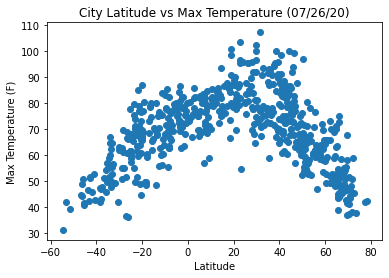

In [13]:
#create a scatter plot of latitude vs temperature

plt.scatter(weather_df["Lat"],weather_df["Max Temp"])

plt.title("City Latitude vs Max Temperature (07/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('lat_vs_temp.png')
plt.show()

In [30]:
# The above scatter plot show the relationship between a city's latitude and its max temperature on 07/26/21.
# As can be seen, latitudes further from zero tend to have lower max temperatures on this date.

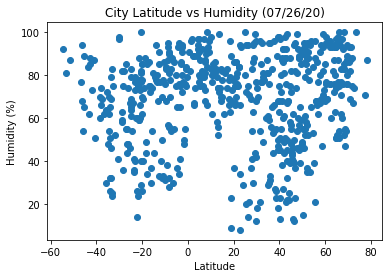

In [14]:
# create a scatter plot of latitude vs humidity
plt.scatter(weather_df["Lat"],weather_df["Humidity"])

plt.title("City Latitude vs Humidity (07/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('lat_vs_humidity.png')
plt.show()

In [15]:
# The above scatter plot shows the relationship between a city's latitude and its humidity on 07/26/21
# There appears to be no significant correlation between the two on this date.


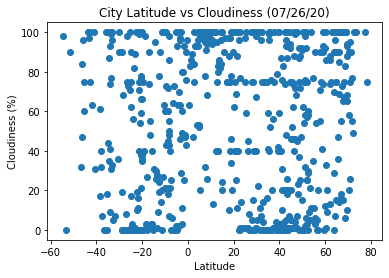

In [16]:
#create a scatter plot of latitude vs cloudiness

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])

plt.title("City Latitude vs Cloudiness (07/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('lat_vs_cloudiness.png')
plt.show()

In [17]:
# The above scatter plot show the relationship between a city's latitude and its humidity on 07/26/21
# There does not appear to be a significant correlation, howevever the data seems to fall more at high or low degrees of cloudiness
# than at more moderate degrees of cloudiness

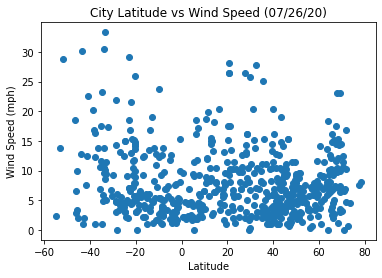

In [18]:
#create a scatter plot of latitude vs wind speed

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])

plt.title("City Latitude vs Wind Speed (07/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('lat_vs_wind.png')
plt.show()

In [19]:
# The above scatter plot show the relationship between a city's latitude and its wind speed on 07/26/21
# There does not appear to be a particularly significant correlation between the two on this date

In [20]:
#create separate dataframes for Northern and Southern hemisphere

north_df = weather_df.loc[weather_df['Lat'] > 0]
north_df

south_df = weather_df.loc[weather_df['Lat'] < 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conceição do Araguaia,-8.2578,-49.2647,82.35,32,48,2.39,BR,1627337423
3,Bambous Virieux,-20.3428,57.7575,66.22,77,77,14.47,MU,1627337424
5,Rikitea,-23.1203,-134.9692,74.08,77,89,18.45,PF,1627337425
7,East London,-33.0153,27.9116,64.90,25,100,11.39,ZA,1627337425
8,Gold Coast,-28.0000,153.4333,55.20,82,0,0.00,AU,1627337426
...,...,...,...,...,...,...,...,...,...
584,Sambava,-14.2667,50.1667,69.91,79,95,13.49,MG,1627337558
585,Tocopilla,-22.0920,-70.1979,61.72,77,19,13.00,CL,1627337527
587,Chicama,-7.8447,-79.1469,66.74,70,21,9.82,PE,1627337558
588,Mayor Pablo Lagerenza,-19.9309,-60.7718,87.19,26,0,5.46,PY,1627337559


In [32]:
#calculate linear regression for temperature vs latitude for only Northern Hemisphere cities
nt_pearson = st.pearsonr(north_df["Lat"],north_df["Max Temp"])
print(f"For Nothern Hemisphere Latitude vs Temperature the Pearson r value is {nt_pearson[0]} and the Pearson p value is {nt_pearson[1]}")

(nt_slope, nt_intercept, nt_rvalue, nt_pvalue, nt_stderr) = linregress(north_df["Lat"],north_df["Max Temp"])

nt_regress_values = (north_df["Lat"] * nt_slope + nt_intercept)

nt_equation = "y = "+str(round(nt_slope,2))+"x+" +str(round(nt_intercept,2))

nt_regress_values

For Nothern Hemisphere Latitude vs Temperature the Pearson r value is -0.6528526146146787 and the Pearson p value is 4.520139685951831e-50


1      53.821663
2      57.659410
4      89.386173
6      89.529075
10     59.856560
         ...    
586    90.471414
589    67.705927
591    65.585868
592    71.938494
593    65.933659
Name: Lat, Length: 401, dtype: float64

In [33]:
print(nt_equation)

y = -0.48x+90.85


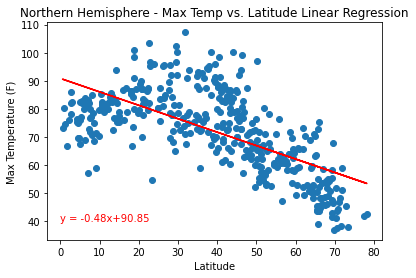

In [34]:
#create a Latutide vs Temperature scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nt_regress_values, "r-")
plt.annotate(nt_equation,(0,40),color="r")
plt.savefig('north_temp_regression.png')
plt.show()



In [35]:
#calculate linear regression for temperature vs latitude for only Southern Hemisphere cities
st_pearson = st.pearsonr(south_df["Lat"],south_df["Max Temp"])
print(f"For Southern Hemisphere Latitude vs Temperature the Pearson r value is {nt_pearson[0]} and the Pearson p value is {nt_pearson[1]}")

(st_slope, st_intercept, st_rvalue, st_pvalue, st_stderr) = linregress(south_df["Lat"],south_df["Max Temp"])

st_regress_values = (south_df["Lat"] * st_slope + st_intercept)
st_equation = "y = "+str(round(st_slope,2))+"x+" +str(round(st_intercept,2))

st_regress_values

For Southern Hemisphere Latitude vs Temperature the Pearson r value is -0.6528526146146787 and the Pearson p value is 4.520139685951831e-50


0      72.810986
3      64.368965
5      62.428732
7      55.516543
8      59.020000
         ...    
584    68.613447
585    63.147055
587    73.099559
588    64.656699
590    66.704090
Name: Lat, Length: 193, dtype: float64

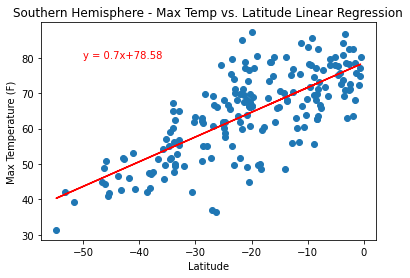

In [39]:
#create a Latutide vs Temperature scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], st_regress_values, "r-")
plt.annotate(st_equation,(-50,80),color="r")
plt.savefig('south_temp_regression.png')
plt.show()


In [61]:
# The above scatter plots with linear regression show the relationship between temperature and distance from the equator.
# For cities in both hemispheres, the linear regression shows that there is a negative correlation between distance from the equator and temperature.

In [48]:
#calculate linear regression for humidity vs latitude for only Northern Hemisphere cities
nh_pearson = st.pearsonr(north_df["Lat"],north_df["Humidity"])
print(f"For Nothern Hemisphere Latitude vs Humidity the Pearson r value is {nh_pearson[0]} and the Pearson p value is {nh_pearson[1]}")

(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = linregress(north_df["Lat"],north_df["Humidity"])

nh_regress_values = (north_df["Lat"] * nh_slope + nh_intercept)

nh_equation = "y = "+str(round(nh_slope,2))+"x+" +str(round(nh_intercept,2))

nh_regress_values

For Nothern Hemisphere Latitude vs Humidity the Pearson r value is -0.016315836822148877 and the Pearson p value is 0.7446315726807989


1      70.028995
2      70.173797
4      71.370882
6      71.376273
10     70.256698
         ...    
586    71.411829
589    70.552863
591    70.472871
592    70.712562
593    70.485994
Name: Lat, Length: 401, dtype: float64

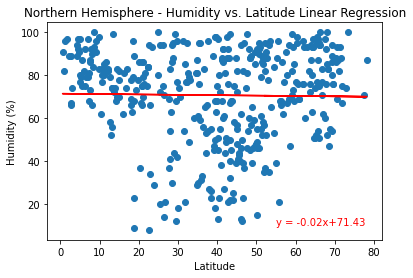

In [49]:
#create a Latutide vs Humidity scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nh_regress_values, "r-")
plt.annotate(nh_equation,(55,10),color="r")
plt.savefig('north_humid_regression.png')
plt.show()

In [50]:
#calculate linear regression for humidity vs latitude for only Southern Hemisphere cities
sh_pearson = st.pearsonr(south_df["Lat"],south_df["Humidity"])
print(f"For Southern Hemisphere Latitude vs Humidity the Pearson r value is {sh_pearson[0]} and the Pearson p value is {sh_pearson[1]}")

(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = linregress(south_df["Lat"],south_df["Humidity"])

sh_regress_values = (south_df["Lat"] * sh_slope + sh_intercept)

sh_equation = "y = "+str(round(sh_slope,2))+"x+" +str(round(sh_intercept,2))

sh_regress_values

For Southern Hemisphere Latitude vs Humidity the Pearson r value is 0.06421575179340008 and the Pearson p value is 0.37495257722435227


0      67.005839
3      65.794063
5      65.515560
7      64.523378
8      65.026267
         ...    
584    66.403320
585    65.618669
587    67.047261
588    65.835364
590    66.129249
Name: Lat, Length: 193, dtype: float64

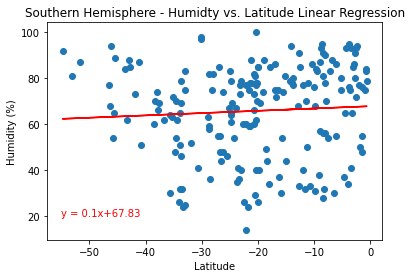

In [51]:
#create a Latutide vs Humidity scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidty vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sh_regress_values, "r-")
plt.annotate(sh_equation,(-55,20),color="r")
plt.savefig('south_humid_regression.png')
plt.show()

# The above linear regressions show that there is not a strong correlation between latitude and humidity for either the Northern hemisphere or the Southern hemisphere.

In [60]:
#calculate linear regression for cloudiness vs latitude for only Northern Hemisphere cities
nc_pearson = st.pearsonr(north_df["Lat"],north_df["Cloudiness"])
print(f"For Nothern Hemisphere Latitude vs Cloudiness the Pearson r value is {nc_pearson[0]} and the Pearson p value is {nc_pearson[1]}")

(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = linregress(north_df["Lat"],north_df["Cloudiness"])

nc_regress_values = (north_df["Lat"] * nc_slope + nc_intercept)

nc_equation = "y = "+str(round(nc_slope,2))+"x+" +str(round(nc_intercept,2))

nc_regress_values

For Nothern Hemisphere Latitude vs Cloudiness the Pearson r value is -0.10951777313601789 and the Pearson p value is 0.028318519326056446


1      47.340214
2      49.042934
4      63.119368
6      63.182771
10     50.017759
         ...    
586    63.600865
589    53.500342
591    52.559721
592    55.378235
593    52.714028
Name: Lat, Length: 401, dtype: float64

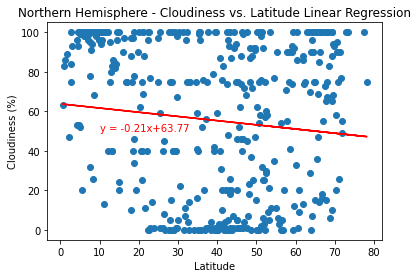

In [61]:
#create a Latutide vs Humidity scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nc_regress_values, "r-")
plt.annotate(nc_equation,(10,50),color="r")
plt.savefig('north_cloud_regression.png')
plt.show()

In [62]:
#calculate linear regression for cloudiness vs latitude for only Southern Hemisphere cities
sc_pearson = st.pearsonr(south_df["Lat"],south_df["Cloudiness"])
print(f"For Southern Hemisphere Latitude vs Cloudiness the Pearson r value is {sc_pearson[0]} and the Pearson p value is {sc_pearson[1]}")

(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = linregress(south_df["Lat"],south_df["Cloudiness"])

sc_regress_values = (south_df["Lat"] * sc_slope + sc_intercept)

sc_equation = "y = "+str(round(sc_slope,2))+"x+" +str(round(sc_intercept,2))

sc_regress_values

For Southern Hemisphere Latitude vs Cloudiness the Pearson r value is -0.04834531758313621 and the Pearson p value is 0.5043492530398173


0      45.313559
3      46.976857
5      47.359133
7      48.721014
8      48.030742
         ...    
584    46.140584
585    47.217605
587    45.256703
588    46.920166
590    46.516776
Name: Lat, Length: 193, dtype: float64

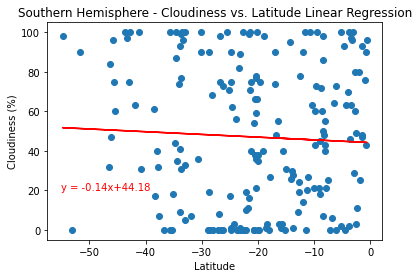

In [66]:
#create a Latutide vs Cloudiness scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sc_regress_values, "r-")
plt.annotate(sc_equation,(-55,20),color="r")
plt.savefig('south_cloud_regression.png')
plt.show()

In [74]:
# The linear regressions above show that there is a much stronger correlation between distance from the equator and cloudiness for cities in the Southern hemisphere
# than for cities in the Northern hemisphere.

In [67]:
#calculate linear regression for wind speed vs latitude for only Northern Hemisphere cities
nw_pearson = st.pearsonr(north_df["Lat"],north_df["Wind Speed"])
print(f"For Nothern Hemisphere Latitude vs Wind Speed the Pearson r value is {nw_pearson[0]} and the Pearson p value is {nw_pearson[1]}")

(nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr) = linregress(north_df["Lat"],north_df["Wind Speed"])

nw_regress_values = (north_df["Lat"] * nw_slope + nw_intercept)

nw_equation = "y = "+str(round(nw_slope,2))+"x+" +str(round(nw_intercept,2))

nw_regress_values

For Nothern Hemisphere Latitude vs Wind Speed the Pearson r value is -0.026327214806733133 and the Pearson p value is 0.5991331978216691


1      7.222964
2      7.278423
4      7.736904
6      7.738970
10     7.310174
         ...   
586    7.752587
589    7.423605
591    7.392968
592    7.484769
593    7.397994
Name: Lat, Length: 401, dtype: float64

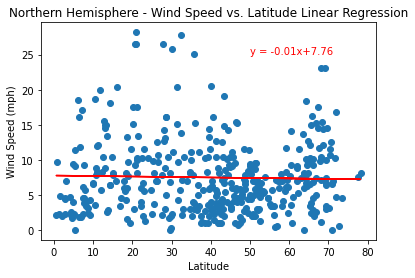

In [69]:
#create a Latutide vs Wind Speed scatter plot with linear regression for only Northern Hemisphere cities

plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(north_df["Lat"], nw_regress_values, "r-")
plt.annotate(nw_equation,(50,25),color="r")
plt.savefig('north_wind_regression.png')
plt.show()

In [70]:
#calculate linear regression for cloudiness vs latitude for only Southern Hemisphere cities
sw_pearson = st.pearsonr(south_df["Lat"],south_df["Wind Speed"])
print(f"For Southern Hemisphere Latitude vs Wind Speed the Pearson r value is {sw_pearson[0]} and the Pearson p value is {sw_pearson[1]}")

(sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr) = linregress(south_df["Lat"],south_df["Wind Speed"])

sw_regress_values = (south_df["Lat"] * sw_slope + sw_intercept)

sw_equation = "y = "+str(round(sw_slope,2))+"x+" +str(round(sw_intercept,2))

sw_regress_values

For Southern Hemisphere Latitude vs Wind Speed the Pearson r value is -0.321294918090028 and the Pearson p value is 5.214751254629544e-06


0       6.338193
3       8.307521
5       8.760132
7      10.372586
8       9.555311
         ...    
584     7.317382
585     8.592564
587     6.270876
588     8.240399
590     7.762790
Name: Lat, Length: 193, dtype: float64

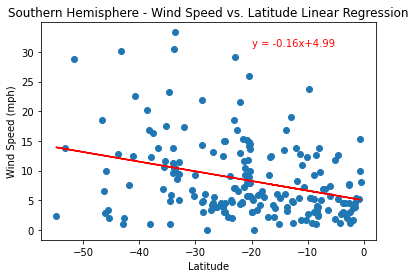

In [72]:
#create a Latutide vs Cloudiness scatter plot with linear regression for only Southern Hemisphere cities

plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(south_df["Lat"], sw_regress_values, "r-")
plt.annotate(sw_equation,(-20,31),color="r")
plt.savefig('south_wind_regression.png')
plt.show()

In [79]:
#The above linear regressions show little relationship between distance fromt the equator and a city's wind speed.